# Bakery Selection and Operation Simulation Project
There is 5 Bakeries in a Small town and we want to model how a person could choose between these bakeries to get his/her bread from. with a beta distributed probability model, we can show that each Success (utility with value of 0 or 1) that the person gets from a certain bakery will affect his/her choice tomorrow and so on. 

### Importing the needed Libraries
- `numpy` (as `np`): This library provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- `pandas` (as `pd`): Pandas is a powerful library for data manipulation and analysis. It provides data structures like DataFrames, which are ideal for handling structured data.
- `random`: This module provides functions for generating random numbers. It's useful for tasks like random sampling and shuffling. 

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns

### Creating a DataFrame in order to keep track of the Bakeries
- `bakeries`: This is a list containing the names of the five bakeries
- `ones`: This list contains five elements, initialized with zeros. It likely represents the number of times each bakery has generated a "1" (or a successful outcome) so far.
- `zeros`: Similar to `ones`, this list contains five elements initialized with zeros, representing the number of times each bakery has generated a "0" (or an unsuccessful outcome) so far. 
- `probs`: This list contains the initial probabilities of selecting each bakery.  It initializes with the same value `p` for all bakeries.

In [2]:
bakeries = ['bakery1','bakery2','bakery3','bakery4','bakery5']
ones = [0,0,0,0,0]
zeros = [0,0,0,0,0]
p = 0.2
probs = [p,p,p,p,p]

This cell creates a DataFrame (`df`) using the pandas library to organize and store the information about the bakeries:

- `df`: This is a DataFrame object created using `pd.DataFrame()`.
- `df['bakeries']`: This column in the DataFrame stores the names of the bakeries.
- `df['ones']`: This column stores the number of times each bakery has generated a '1' (success).
- `df['zeros']`: This column stores the number of times each bakery has generated a '0' (failure).
- `df['probs']`: This column stores the probabilities of success for each bakery.
- `df.index += 1`: This line increments the index of the DataFrame by 1 to start indexing from 1 instead of 0.

In [3]:
df = pd.DataFrame()
df['bakeries'] = bakeries
df['ones'] = ones
df['zeros'] = zeros
df['probs'] = probs
df.index +=1

In [4]:
df

,bakeries,ones,zeros,probs
1,bakery1,0,0,0.2
2,bakery2,0,0,0.2
3,bakery3,0,0,0.2
4,bakery4,0,0,0.2
5,bakery5,0,0,0.2


### Building the parts of the Simulation
`

This function, `choosing_bakery()`, selects the bakery with the highest probability of success for the current day's operation. It utilizes the `idxmax()` function provided by pandas to return the index (which corresponds to the bakery's position in the DataFrame) of the bakery with the maximum probability value stored in the 'probs' column of the DataFrame `df`. This index represents the chosen bakery for the day.

In [5]:
def choosing_bakery():
    return df['probs'].idxmax()

This function, `generate_result()`, simulates the result of the chosen bakery's operation for the day:

- It first retrieves the maximum probability of success (`p`) from the 'probs' column of the DataFrame `df`.
- It then creates a list of weights, where the weight for generating a '1' (success) is set to `p`, and the weight for generating a '0' (failure) is set to `1-p`.
- Using `random.choices()`, it randomly selects either '1' or '0' based on the weights defined earlier.
- Finally, it returns the simulated result (`n`), which is either '1' or '0' representing success or failure for the chosen bakery on that day.

In [6]:
def generate_result():
    p = df['probs'].max()
    weights = [p, 1-p]
    n = random.choices([1, 0] ,weights=weights)[0]
    return n

This function, `update(i, result, df)`, is responsible for updating the information about a bakery based on the result of its operation for the day:

- It takes three parameters: `i` (the index of the bakery in the DataFrame), `result` (the outcome of the bakery's operation for the day), and `df` (the DataFrame containing bakery information).
- If the `result` is '0' (indicating failure), it increments the count of failures (`zeros`) for the bakery at index `i` in the DataFrame.
- If the `result` is '1' (indicating success), it increments the count of successes (`ones`) for the bakery at index `i` in the DataFrame.
- It then updates the probability of success (`probs`) for the bakery at index `i` using the Beta distribution. The parameters of the Beta distribution are updated based on the incremented counts of successes and failures for the bakery.
- Finally, it returns the updated DataFrame `df` with the bakery information.

In [7]:
def update(i,result,df):
    if result == 0:
        df.loc[i,'zeros'] += 1
    else:
        df.loc[i,'ones'] += 1
    df.loc[i,'probs'] = np.random.beta(df.loc[i,'ones'] + 1, df.loc[i,'zeros'] + 1)
    return df

### 1 Year Simulation
This code iterates over 12 months and within each month, over 30 days. For each day:

- If it's the first day of the month (`day == 0`), it randomly selects a bakery index (`i`) from the list of bakery indices [1, 2, 3, 4, 5].
- For subsequent days, it calls the `choosing_bakery()` function to determine the index of the bakery (`i`) with the highest probability of success for that day.
- It then calls the `generate_result()` function to simulate the result of the chosen bakery's operation for the day.
- The `update()` function is then called to update the information about the chosen bakery based on the simulated result.
- Information about the month, day, chosen bakery, and result is appended to separate lists (`months`, `days`, `bakeries`, `results`) for further analysis or visualization.

In [8]:
months = []
days = []
bakeries = []
results = []
for month in range(12):
    for day in range(30):
        if day == 0:
            i = random.choice([1,2,3,4,5])
        else:
            i = choosing_bakery()
        result = generate_result()
        update(i,result,df)
        months.append('Month {}'.format(month+1))
        days.append('Day {}'.format(day+1))
        bakeries.append(df.loc[i,'bakeries'])
        results.append(result)  

In this code snippet, a new DataFrame `df1` is created using pandas. It organizes and stores the information collected during the simulation:

- `df1`: This is a DataFrame object created using `pd.DataFrame()`.
- `df1['days']`: This column stores the names of the days in the simulation.
- `df1['months']`: This column stores the names of the months in the simulation.
- `df1['bakeries']`: This column stores the names of the bakeries selected on each day.
- `df1['results']`: This column stores the results of the bakery operations on each day (either '1' for success or '0' for failure).
- `df1.index += 1`: This line increments the index of the DataFrame by 1 to start indexing from 1 instead of 0.

In [9]:
df1 = pd.DataFrame()
df1['days'] = days
df1['months'] = months
df1['bakeries'] = bakeries
df1['results'] = results
df1.index +=1

### Final DataFrames and breef

In [10]:
df

,bakeries,ones,zeros,probs
1,bakery1,39,30,0.442708
2,bakery2,10,3,0.612579
3,bakery3,3,2,0.642062
4,bakery4,192,77,0.678197
5,bakery5,3,1,0.592394


In [11]:
df1

,days,months,bakeries,results
1,Day 1,Month 1,bakery5,0
2,Day 2,Month 1,bakery1,1
3,Day 3,Month 1,bakery1,1
4,Day 4,Month 1,bakery1,1
5,Day 5,Month 1,bakery1,0
...,...,...,...,...
356,Day 26,Month 12,bakery4,0
357,Day 27,Month 12,bakery4,0
358,Day 28,Month 12,bakery4,1
359,Day 29,Month 12,bakery4,1


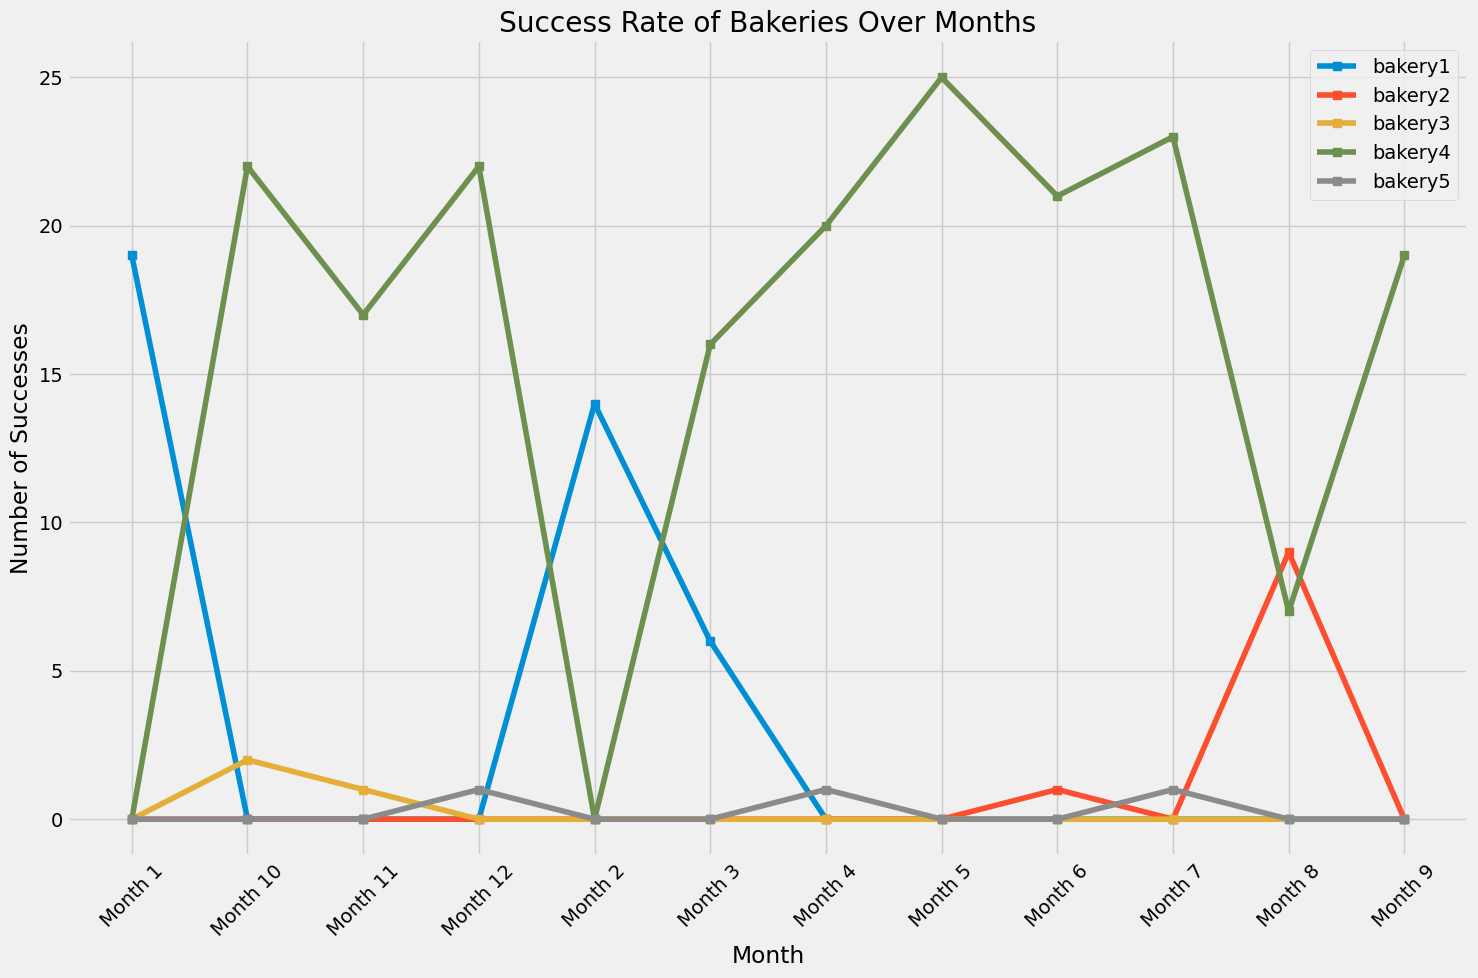

<Figure size 640x480 with 0 Axes>

In [12]:
success_counts = df1[df1['results'] == 1].groupby(['months', 'bakeries']).size().unstack(fill_value=0)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
for i, bakery in enumerate(success_counts.columns):
    plt.plot(success_counts.index, success_counts[bakery], marker='s', label=bakery)

plt.title('Success Rate of Bakeries Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Successes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('Comparison.png')